In [41]:
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.preprocessing import StandardScaler

In [42]:
# Load the CSV file into a DataFrame

df = pd.read_csv("dataset_final.csv")
print(df.columns)



Index(['Service', 'Sexe', 'Etat-civil', 'Température', 'FC', 'FR',
       'TA_Systolique', 'TA_Diastolique', 'Diagnostic',
       'Motif de consultation_'],
      dtype='object')


In [43]:
df

,Service,Sexe,Etat-civil,Température,FC,FR,TA_Systolique,TA_Diastolique,Diagnostic,Motif de consultation_
0,pediatrie generale,F,célibataire,36.0,100,24,100,60,infection urinaire,1.671624
1,gynecologie,F,marié,36.7,88,18,121,67,syndrome infectieux,2.440019
2,pediatrie generale,M,célibataire,36.6,100,24,100,60,ist,1.892567
3,medecine interne,M,marié,36.0,77,18,127,86,infection urogénitale,1.409606
4,medecine interne,M,marié,36.0,78,20,117,78,ist,1.000000
...,...,...,...,...,...,...,...,...,...,...
3161,pediatrie generale,F,célibataire,36.4,120,28,100,60,ist,2.713191
3162,pediatrie generale,M,célibataire,36.9,100,24,100,60,sepsis,1.920079
3163,medecine interne,F,célibataire,36.4,81,17,130,88,syndrome infectieux,1.732007
3164,gynecologie,M,marié,36.7,87,18,113,77,infection urinaire,1.000000


In [12]:
import numpy as np
import pandas as pd
data = [[1, 2, 3, 4, 5, 6, 7, 8]]
cols = ['Service', 'Sexe', 'Etat-civil', 'Température', 'FR', 'TA_Diastolique', 'Diagnostic', 'Motif de consultation_']
df2 = pd.DataFrame(np.array(data), columns=cols)
df2

,Service,Sexe,Etat-civil,Température,FR,TA_Diastolique,Diagnostic,Motif de consultation_
0,1,2,3,4,5,6,7,8


In [13]:
help(pd.DataFrame)

Help on class DataFrame in module pandas.core.frame:

class DataFrame(pandas.core.generic.NDFrame, pandas.core.arraylike.OpsMixin)
 |  DataFrame(data=None, index: 'Axes | None' = None, columns: 'Axes | None' = None, dtype: 'Dtype | None' = None, copy: 'bool | None' = None)
 |  
 |  Two-dimensional, size-mutable, potentially heterogeneous tabular data.
 |  
 |  Data structure also contains labeled axes (rows and columns).
 |  Arithmetic operations align on both row and column labels. Can be
 |  thought of as a dict-like container for Series objects. The primary
 |  pandas data structure.
 |  
 |  Parameters
 |  ----------
 |  data : ndarray (structured or homogeneous), Iterable, dict, or DataFrame
 |      Dict can contain Series, arrays, constants, dataclass or list-like objects. If
 |      data is a dict, column order follows insertion-order. If a dict contains Series
 |      which have an index defined, it is aligned by its index.
 |  
 |      .. versionchanged:: 0.25.0
 |         If 

In [16]:


# Assuming 'df' is your DataFrame and 'Diagnostic' is the name of the column
unique_values = df['Diagnostic'].unique()

# Print unique values
print(unique_values)


['infection urinaire' 'syndrome infectieux' 'ist' 'infection urogénitale'
 'gastrite' 'grippe' 'paludisme' "travail d'accouchement" 'sepsis'
 'hypertension artérielle' 'fièvre typhoïde']


In [17]:
sample_counts = df['Diagnostic'].value_counts()
print(sample_counts)

infection urinaire         567
paludisme                  486
grippe                     361
ist                        318
gastrite                   303
travail d'accouchement     264
hypertension artérielle    208
syndrome infectieux        199
fièvre typhoïde            194
sepsis                     139
infection urogénitale      127
Name: Diagnostic, dtype: int64


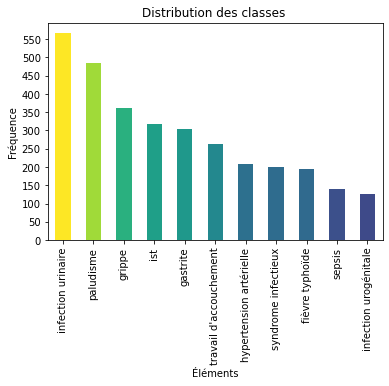

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.cm import ScalarMappable

# Supposons que vous avez un DataFrame df avec une colonne 'col' contenant les données
# df = pd.DataFrame({'col': [1, 2, 2, 3, 3, 3, 4, 4, 4, 4]})
# Utilisez votre propre DataFrame ou créez-en un pour les besoins de l'exemple.

# Calcul de la fréquence de répétition des éléments
freq = df['Diagnostic'].value_counts()

# Sélection des 50 premiers éléments avec une grande répétition
top_50_high_freq_elements = freq.head(15)

# Création d'une colormap basée sur les fréquences
colors = plt.cm.viridis(top_50_high_freq_elements / top_50_high_freq_elements.max())

# Tracé de l'histogramme avec des couleurs associées aux fréquences
bars = top_50_high_freq_elements.plot(kind='bar', color=colors)

# Configuration du titre et des étiquettes des axes
plt.title('Distribution des classes ')
plt.xlabel('Éléments')
plt.ylabel('Fréquence')

# Configuration de l'axe y pour n'afficher que les valeurs de fréquence multiples de 2
plt.yticks(np.arange(0, top_50_high_freq_elements.max() + 1, 50))

# Ajout de la légende de couleurs
sm = ScalarMappable(cmap=plt.cm.viridis)
sm.set_array([])


# Affichage du graphique
plt.show()


In [19]:
values_to_filter = ['infection urogénitale', 'syndrome infectieux', 'fièvre typhoïde', 'hypertension artérielle', 'sepsis']

# Filter out rows where the Diagnostic column matches the values to filter
df = df[~df['Diagnostic'].isin(values_to_filter)]


In [20]:
#transform column service into dummies variables

dummies = pd.get_dummies(df.Service)
df = pd.concat([df, dummies], axis=1)
#df = df.drop(['Service','FC', 'FR', 'TA Systolique','TA Diastolique'], axis=1)
df = df.drop('Service',axis=1)
df

,Sexe,Etat-civil,Température,FC,FR,TA_Systolique,TA_Diastolique,Diagnostic,Motif de consultation_,gynecologie,medecine interne,obstetrique,pediatrie generale
0,F,célibataire,36.0,100,24,100,60,infection urinaire,1.671624,0,0,0,1
2,M,célibataire,36.6,100,24,100,60,ist,1.892567,0,0,0,1
4,M,marié,36.0,78,20,117,78,ist,1.000000,0,1,0,0
5,M,marié,36.7,60,18,162,100,infection urinaire,1.000000,0,1,0,0
7,F,célibataire,36.7,91,18,133,75,gastrite,2.281824,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3159,M,célibataire,36.0,71,20,142,98,gastrite,1.365939,0,1,0,0
3160,F,célibataire,36.8,100,24,100,60,paludisme,1.722474,0,0,0,1
3161,F,célibataire,36.4,120,28,100,60,ist,2.713191,0,0,0,1
3164,M,marié,36.7,87,18,113,77,infection urinaire,1.000000,1,0,0,0


In [21]:
df = df.replace(False, 0)
df = df.replace(True, 1)
df

,Sexe,Etat-civil,Température,FC,FR,TA_Systolique,TA_Diastolique,Diagnostic,Motif de consultation_,gynecologie,medecine interne,obstetrique,pediatrie generale
0,F,célibataire,36.0,100,24,100,60,infection urinaire,1.671624,0,0,0,1
2,M,célibataire,36.6,100,24,100,60,ist,1.892567,0,0,0,1
4,M,marié,36.0,78,20,117,78,ist,1.000000,0,1,0,0
5,M,marié,36.7,60,18,162,100,infection urinaire,1.000000,0,1,0,0
7,F,célibataire,36.7,91,18,133,75,gastrite,2.281824,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3159,M,célibataire,36.0,71,20,142,98,gastrite,1.365939,0,1,0,0
3160,F,célibataire,36.8,100,24,100,60,paludisme,1.722474,0,0,0,1
3161,F,célibataire,36.4,120,28,100,60,ist,2.713191,0,0,0,1
3164,M,marié,36.7,87,18,113,77,infection urinaire,1.000000,1,0,0,0


In [22]:
df['Sexe'] = df['Sexe'].replace('M', 1)

df['Sexe'] = df['Sexe'].replace('F', 0)
df

,Sexe,Etat-civil,Température,FC,FR,TA_Systolique,TA_Diastolique,Diagnostic,Motif de consultation_,gynecologie,medecine interne,obstetrique,pediatrie generale
0,0,célibataire,36.0,100,24,100,60,infection urinaire,1.671624,0,0,0,1
2,1,célibataire,36.6,100,24,100,60,ist,1.892567,0,0,0,1
4,1,marié,36.0,78,20,117,78,ist,1.000000,0,1,0,0
5,1,marié,36.7,60,18,162,100,infection urinaire,1.000000,0,1,0,0
7,0,célibataire,36.7,91,18,133,75,gastrite,2.281824,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3159,1,célibataire,36.0,71,20,142,98,gastrite,1.365939,0,1,0,0
3160,0,célibataire,36.8,100,24,100,60,paludisme,1.722474,0,0,0,1
3161,0,célibataire,36.4,120,28,100,60,ist,2.713191,0,0,0,1
3164,1,marié,36.7,87,18,113,77,infection urinaire,1.000000,1,0,0,0


In [23]:
unique_values = df['Etat-civil'].unique()

# Print unique values
print(unique_values)

['célibataire' 'marié' 'veuf ve' 'divorcée']


In [24]:
df['Etat-civil'] = df['Etat-civil'].replace('célibataire', 1)

df['Etat-civil'] = df['Etat-civil'].replace('marié', 0)
df['Etat-civil'] = df['Etat-civil'].replace('veuf ve', 2)
df['Etat-civil'] = df['Etat-civil'].replace('divorcée', 3)
df

,Sexe,Etat-civil,Température,FC,FR,TA_Systolique,TA_Diastolique,Diagnostic,Motif de consultation_,gynecologie,medecine interne,obstetrique,pediatrie generale
0,0,1,36.0,100,24,100,60,infection urinaire,1.671624,0,0,0,1
2,1,1,36.6,100,24,100,60,ist,1.892567,0,0,0,1
4,1,0,36.0,78,20,117,78,ist,1.000000,0,1,0,0
5,1,0,36.7,60,18,162,100,infection urinaire,1.000000,0,1,0,0
7,0,1,36.7,91,18,133,75,gastrite,2.281824,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3159,1,1,36.0,71,20,142,98,gastrite,1.365939,0,1,0,0
3160,0,1,36.8,100,24,100,60,paludisme,1.722474,0,0,0,1
3161,0,1,36.4,120,28,100,60,ist,2.713191,0,0,0,1
3164,1,0,36.7,87,18,113,77,infection urinaire,1.000000,1,0,0,0


In [25]:
y = df['Diagnostic']
df = df.drop('Diagnostic', axis=1)

x = df

<AxesSubplot:>

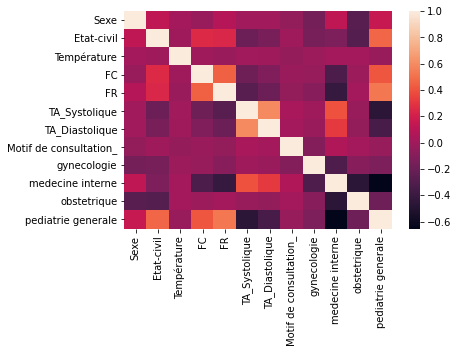

In [26]:
import seaborn as sns
corr = x.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [27]:
li = [[1], [3], [5]]
import numpy as np
li = np.array(li)
li = li.transpose()
print(li)
import pandas as pd
pd.DataFrame(li)

[[1 3 5]]


,0,1,2
0,1,3,5


In [28]:
x = x.drop(['FC','TA_Systolique'], axis =1)

In [29]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
x, y = ros.fit_resample(x, y)


In [30]:
x

,Sexe,Etat-civil,Température,FR,TA_Diastolique,Motif de consultation_,gynecologie,medecine interne,obstetrique,pediatrie generale
0,0,1,36.0,24,60,1.671624,0,0,0,1
1,1,1,36.6,24,60,1.892567,0,0,0,1
2,1,0,36.0,20,78,1.000000,0,1,0,0
3,1,0,36.7,18,100,1.000000,0,1,0,0
4,0,1,36.7,18,75,2.281824,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
3397,0,0,36.0,22,60,2.174789,0,0,1,0
3398,0,0,36.4,22,70,2.466702,1,0,0,0
3399,0,0,36.5,18,73,1.583369,0,0,1,0
3400,0,0,36.0,20,82,1.343948,0,0,1,0


In [31]:
print(y)

0           infection urinaire
1                          ist
2                          ist
3           infection urinaire
4                     gastrite
                 ...          
3397    travail d'accouchement
3398    travail d'accouchement
3399    travail d'accouchement
3400    travail d'accouchement
3401    travail d'accouchement
Name: Diagnostic, Length: 3402, dtype: object


In [32]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the categories
y = label_encoder.fit_transform(y)
# Get unique classes
unique_classes = np.unique(y)

print("Unique classes:", unique_classes)


Unique classes: [0 1 2 3 4 5]


In [33]:
# Assuming 'y' is the column containing class labels in your DataFrame
unique_classes, class_counts = np.unique(y, return_counts=True)
print(unique_classes)
# Print the number of samples per class
print("Number of samples per class:")
for cls, count in zip(unique_classes, class_counts):
    print(f"Class {cls}: {count} samples")

[0 1 2 3 4 5]
Number of samples per class:
Class 0: 567 samples
Class 1: 567 samples
Class 2: 567 samples
Class 3: 567 samples
Class 4: 567 samples
Class 5: 567 samples


In [34]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle = True, stratify=y, random_state=0)

In [39]:
X_test.reset_index(drop= True)

,Sexe,Etat-civil,Température,FR,TA_Diastolique,Motif de consultation_,gynecologie,medecine interne,obstetrique,pediatrie generale
0,0,0,36.2,22,64,1.951703,0,0,1,0
1,1,1,36.8,32,60,2.383200,0,0,0,1
2,1,0,36.6,16,94,1.676939,0,1,0,0
3,0,0,36.6,18,68,1.386553,0,1,0,0
4,1,0,37.5,18,84,3.627087,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
676,1,1,36.5,24,60,2.188976,0,0,0,1
677,0,1,36.6,18,77,2.387661,0,1,0,0
678,0,1,35.9,18,79,1.413542,0,0,0,1
679,0,2,39.7,26,81,2.142978,0,1,0,0


# SVM

In [21]:
# Initialize the SVM classifier with RBF kernel
svm = SVC(kernel='rbf', C=4, gamma=0.099999,  max_iter=1500)
# Train the SVM classifier
svm.fit(X_train, y_train)

# Print the training accuracy
y_test_pred = svm.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Training Accuracy:", test_accuracy)

C:\Users\badji\AppData\Roaming\Python\Python38\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Training Accuracy: 0.461086637298091


In [22]:
from sklearn.metrics import classification_report

# Assuming y_true contains the true labels and y_pred contains the predicted labels
# Replace y_true and y_pred with your actual true and predicted labels

# Generate classification report
report = classification_report(y_test, y_test_pred)

# Print the classification report
print(report)


              precision    recall  f1-score   support

           0       0.35      0.58      0.43       114
           1       0.36      0.35      0.36       113
           2       0.24      0.19      0.21       113
           3       0.55      0.54      0.54       114
           4       0.22      0.13      0.16       114
           5       0.97      0.98      0.98       113

    accuracy                           0.46       681
   macro avg       0.45      0.46      0.45       681
weighted avg       0.45      0.46      0.45       681



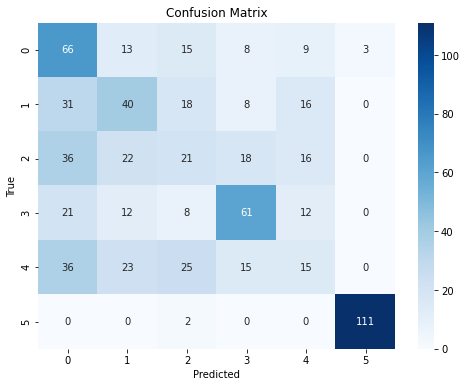

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=unique_classes, yticklabels=unique_classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


# Decisoin Tree

In [33]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

# Train the decision tree classifier
model = dtc.fit(X_train, y_train)


# Print the training accuracy
y_test_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Training Accuracy:", test_accuracy)

Training Accuracy: 0.6005873715124816


In [40]:
y_test

array([5, 4, 0, 2, 4, 2, 0, 2, 2, 3, 2, 1, 0, 0, 1, 5, 4, 5, 4, 3, 0, 0,
       3, 3, 0, 1, 4, 4, 5, 3, 2, 2, 1, 2, 4, 4, 3, 0, 5, 1, 3, 4, 5, 2,
       3, 4, 5, 0, 1, 2, 2, 2, 5, 3, 0, 3, 3, 5, 2, 5, 1, 5, 5, 0, 2, 3,
       4, 4, 5, 3, 1, 4, 4, 1, 1, 0, 3, 3, 4, 3, 3, 1, 1, 4, 2, 1, 1, 5,
       1, 3, 4, 0, 4, 4, 4, 5, 5, 1, 1, 0, 2, 0, 1, 3, 2, 1, 4, 4, 0, 1,
       3, 1, 3, 3, 4, 5, 4, 3, 2, 1, 2, 3, 3, 0, 2, 5, 4, 3, 3, 4, 4, 4,
       2, 3, 2, 0, 0, 5, 0, 2, 3, 2, 4, 4, 4, 5, 4, 2, 0, 1, 1, 5, 0, 2,
       3, 3, 2, 2, 5, 0, 4, 1, 0, 1, 0, 1, 5, 5, 4, 3, 5, 2, 2, 4, 0, 1,
       5, 1, 3, 3, 5, 1, 4, 1, 3, 2, 4, 5, 3, 3, 5, 2, 5, 0, 3, 1, 4, 1,
       3, 4, 5, 2, 1, 1, 0, 1, 1, 0, 4, 0, 1, 0, 4, 5, 3, 0, 2, 1, 5, 3,
       5, 0, 0, 1, 0, 2, 0, 2, 4, 0, 4, 2, 1, 4, 3, 5, 3, 5, 2, 4, 3, 0,
       2, 4, 2, 5, 3, 0, 0, 5, 0, 5, 3, 0, 4, 1, 1, 4, 0, 5, 0, 0, 5, 4,
       4, 1, 4, 5, 1, 4, 5, 1, 5, 0, 1, 0, 1, 5, 3, 4, 3, 1, 0, 5, 3, 0,
       2, 0, 2, 5, 5, 1, 5, 0, 4, 3, 0, 5, 3, 2, 1,

In [34]:
import pickle

def save_model(model,filename):
    pickle.dump(model, open(filename, 'wb'))
    
save_model(model, 'model.pkl')

In [32]:
from sklearn.metrics import classification_report

# Assuming y_true contains the true labels and y_pred contains the predicted labels
# Replace y_true and y_pred with your actual true and predicted labels

# Generate classification report
report = classification_report(y_test, y_test_pred)

# Print the classification report
print(report)

              precision    recall  f1-score   support

           0       0.69      0.76      0.72       114
           1       0.51      0.65      0.57       113
           2       0.24      0.19      0.21       113
           3       0.72      0.76      0.74       114
           4       0.35      0.29      0.32       114
           5       1.00      0.98      0.99       113

    accuracy                           0.60       681
   macro avg       0.59      0.60      0.59       681
weighted avg       0.59      0.60      0.59       681



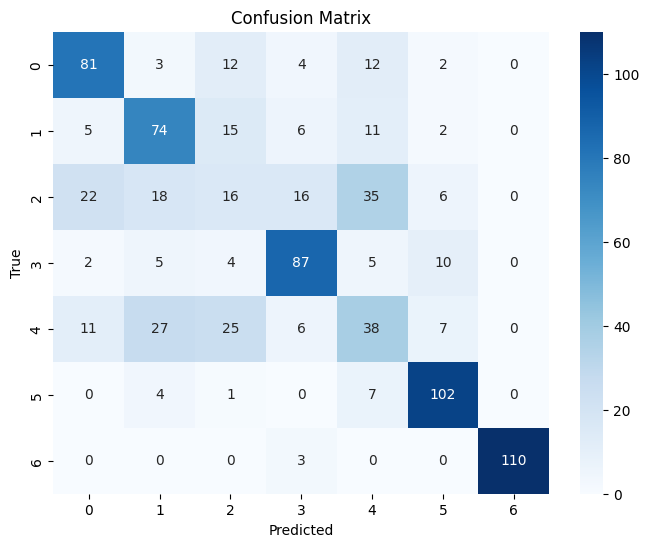

In [228]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=unique_classes, yticklabels=unique_classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Random Forest

In [229]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth=5,n_estimators=1000, random_state=0)
# Train the decision tree classifier
rfc.fit(X_train, y_train)
# Print the training accuracy
y_test_pred = rfc.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Training Accuracy:", test_accuracy)

Training Accuracy: 0.4596977329974811


In [230]:
from sklearn.metrics import classification_report

# Assuming y_true contains the true labels and y_pred contains the predicted labels
# Replace y_true and y_pred with your actual true and predicted labels

# Generate classification report
report = classification_report(y_test, y_test_pred)

# Print the classification report
print(report)

              precision    recall  f1-score   support

           0       0.29      0.89      0.43       114
           1       0.42      0.10      0.16       113
           2       0.00      0.00      0.00       113
           3       0.54      0.45      0.49       113
           4       0.38      0.04      0.08       114
           5       0.44      0.75      0.55       114
           6       0.98      0.99      0.99       113

    accuracy                           0.46       794
   macro avg       0.44      0.46      0.39       794
weighted avg       0.44      0.46      0.39       794



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


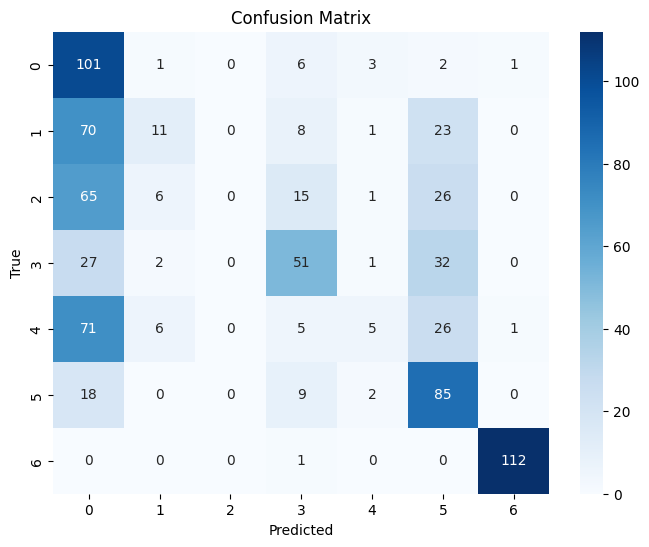

In [231]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=unique_classes, yticklabels=unique_classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# K Nearest Neighbors

In [233]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
# Print the training accuracy
y_test_pred = neigh.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Training Accuracy:", test_accuracy)

Training Accuracy: 0.5340050377833753


In [234]:
from sklearn.metrics import classification_report

# Assuming y_true contains the true labels and y_pred contains the predicted labels
# Replace y_true and y_pred with your actual true and predicted labels

# Generate classification report
report = classification_report(y_test, y_test_pred)

# Print the classification report
print(report)

              precision    recall  f1-score   support

           0       0.44      0.70      0.54       114
           1       0.46      0.51      0.49       113
           2       0.17      0.13      0.15       113
           3       0.59      0.54      0.56       113
           4       0.30      0.16      0.21       114
           5       0.72      0.78      0.75       114
           6       0.90      0.91      0.91       113

    accuracy                           0.53       794
   macro avg       0.51      0.53      0.52       794
weighted avg       0.51      0.53      0.52       794



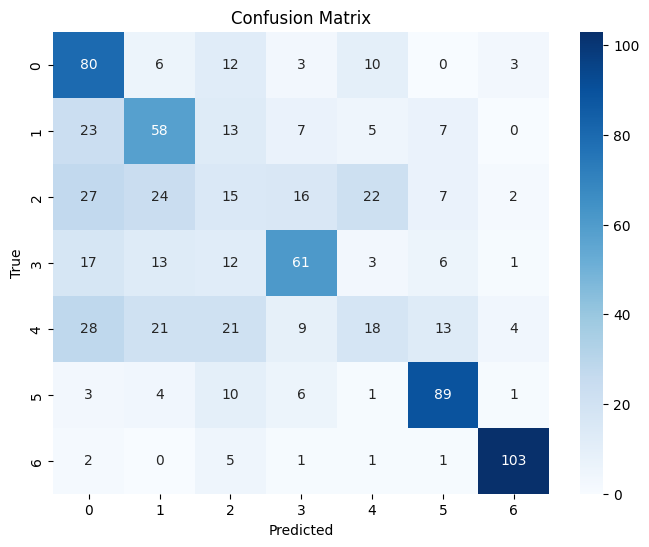

In [235]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=unique_classes, yticklabels=unique_classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## TF IDF sur le dataset avec 11 classes

In [2]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [4]:
# Replace 'your_file.csv' with the path to your CSV file
file_path = 'df.csv'

# Load the CSV file into a DataFrame

df = pd.read_csv("df.csv")
print(df.columns)

df = df.drop('Unnamed: 0', axis=1)

Index(['Unnamed: 0', 'Service', 'Sexe', 'Etat-civil', 'Température', 'FC',
       'FR', 'TA_Systolique', 'TA_Diastolique', 'Motif_de_consultation',
       'Diagnostic'],
      dtype='object')


In [ ]:
import pandas as pd
from nltk import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import csv
import numpy as np




df2 = df['Motif_de_consultation']

print(df2)
#dfakim= np.where(len(df['Message'])==0)

for item in range(len(df2)):
     if item == 0:
         corpus = [df2.loc[item]]
         #print(corpus)
         tok = [word_tokenize(df2.loc[item])]
         wordset = set(tok[item][:])
         ##print(corpus)
     else:

         corpus.append(df2.loc[item])
         tok.append(word_tokenize(df2.loc[item]))


         wordset = set(tok[0][:]).union(set(tok[item][:]))


tfidf = TfidfVectorizer().fit(corpus)

count = tfidf.get_feature_names_out()
print(count)

vector = tfidf.transform(corpus)
df_tfidf_vect = pd.DataFrame(data = vector.toarray(),columns=count)

print(df_tfidf_vect)

#df_tfidf_vect.to_csv('tfidf.csv')
#print(df_tfidf_vect[df_tfidf_vect['keystone_authtoken'] > 0])


df['Motif de consultation_'] =  df_tfidf_vect.sum(axis=1)

print(df['Motif de consultation_'])

df = df.drop('Motif_de_consultation',axis = 1)
df.to_csv('dataset_final.csv', index=False)


# pd.set_option('display.max_rows', 10)
# reg = pd.read_csv('C:/Users\hp/Desktop/log/datasetVec3.csv')
# print(reg)
# print(reg.head())